In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
import keras.utils
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("C://Users//neyve//Downloads//Songs.csv//Songs.csv")
data.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


# EDA

In [6]:
#Printing the names of artists in the lyrics data
print("Artists in the data:\n",data.Artist.value_counts()) 

Artists in the data:
 Artist
Taylor Swift          50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Billie Eilish         50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Ray LaMontagne        30
Elton John            30
Queen                 30
Frank Sinatra         30
John Denver           30
Bryan Adams           30
​twenty one pilots    30
Nat King Cole         30
Lana Del Rey          30
Vance Joy             30
George Michael        30
Bob Dylan             20
Ed Sheeran            20
Name: count, dtype: int64


In [7]:
#Printing the size of dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (745, 3)


In [8]:
#Adding a column of numbers of Characters,words and sentences in each msg
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.400000,46.277852
std,666.721467,156.163646,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


<Figure size 1500x1500 with 0 Axes>

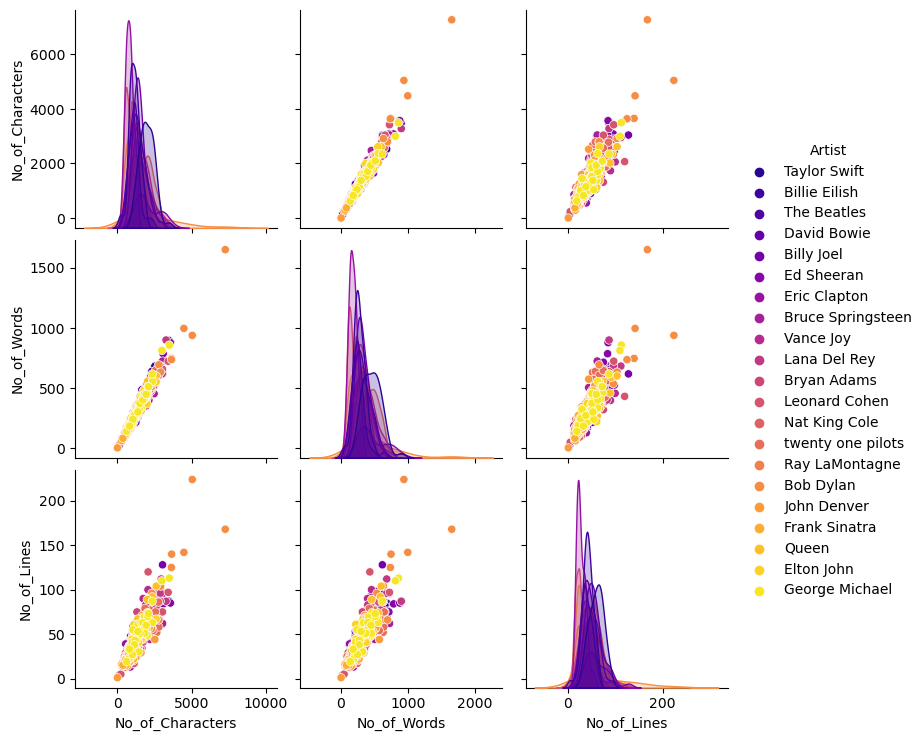

In [9]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")

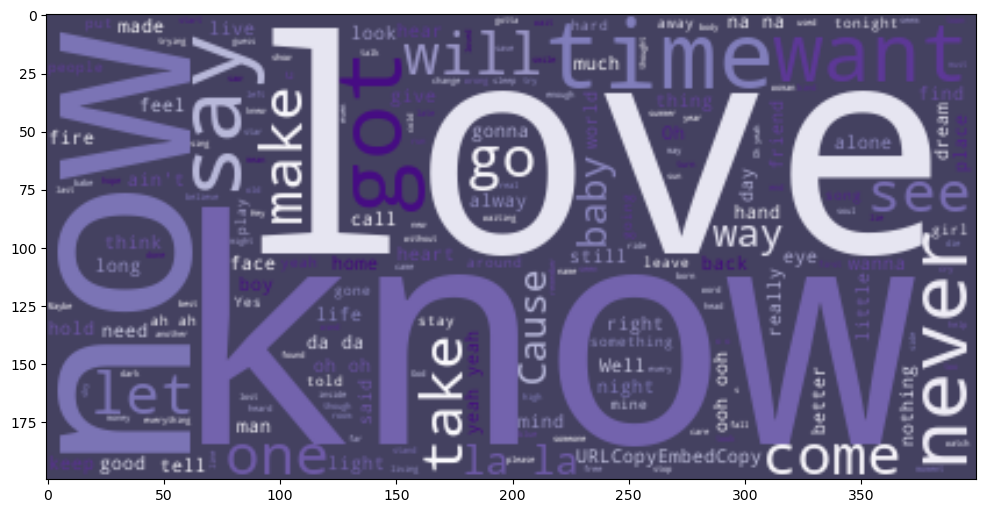

In [10]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

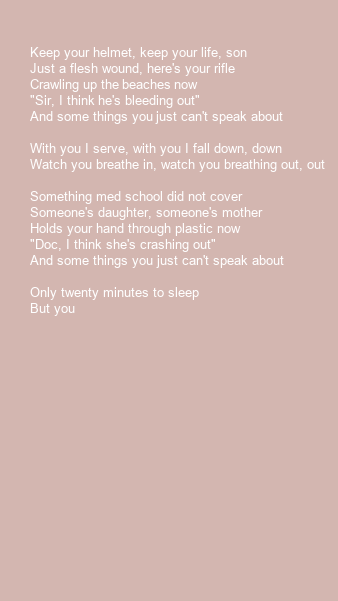

In [37]:
#A function to disply the song in an asthetically pleasing way! lol
import textwrap
def My_song(song):
    img = Image.open("C://Users//neyve//OneDrive//Desktop//aishu//python projects//backgroundimage.jpg")
    Text_on_image = ImageDraw.Draw(img)
    myFont = ImageFont.truetype("arial.ttf",13)
    wrapped_text = textwrap.fill(song, width=40)
    Text_on_image.text((30,45), song, font=myFont, fill =(255, 255, 255))
    return img    
#Having a look at the first 500 charachters of a random song lyrics
My_song(data.Lyrics[42][:500])

In [23]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem
    
Corpus = Corpus.lower() #converting all alphabets to lowecase 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 92


In [24]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [25]:
#Keeping only a limited set of characters. 
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', 
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

#Corpus = re.sub("[^A-Za-z0-9'\.\n]","",Corpus) Alterneativly could be used but I want to pick and chose (:

In [26]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [27]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [28]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1045454


In [30]:
# reshape X and normalize
from tensorflow.keras.utils import to_categorical
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = to_categorical(targets)

In [31]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary               
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 47)                  │          12,079 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,271 (1.05 MB)

 Trainable params: 276,271 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1493s 182ms/step - loss: 2.7244
Epoch 2/100
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1678s 205ms/step - loss: 2.2909
Epoch 3/100
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1327s 162ms/step - loss: 2.1181
Epoch 4/100
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 886s 108ms/step - loss: 2.0104
Epoch 5/100
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 850s 104ms/step - loss: 1.9365
Epoch 6/100
3618/8168 ━━━━━━━━━━━━━━━━━━━━ 8:36 113ms/step - loss: 1.8796

KeyboardInterrupt: 

In [33]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=20)

Epoch 1/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 785s 96ms/step - loss: 1.8589
Epoch 2/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1029s 126ms/step - loss: 1.8237
Epoch 3/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 973s 119ms/step - loss: 1.7799
Epoch 4/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 804s 98ms/step - loss: 1.7364
Epoch 5/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 822s 101ms/step - loss: 1.7338
Epoch 6/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 835s 102ms/step - loss: 1.7282
Epoch 7/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 853s 104ms/step - loss: 1.6966
Epoch 8/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1120s 137ms/step - loss: 1.6833
Epoch 9/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 3420s 419ms/step - loss: 1.6736
Epoch 10/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1426s 175ms/step - loss: 1.6377
Epoch 11/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1433s 175ms/step - loss: 1.6451
Epoch 12/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 1196s 146ms/step - loss: 1.6447
Epoch 13/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 835s 102ms/step - loss: 1.6207
Epoch 14/20
8168/8168 ━━━━━━━━━━━━━━━━━━━━ 

[Text(0.5, 0, 'Epochs')]

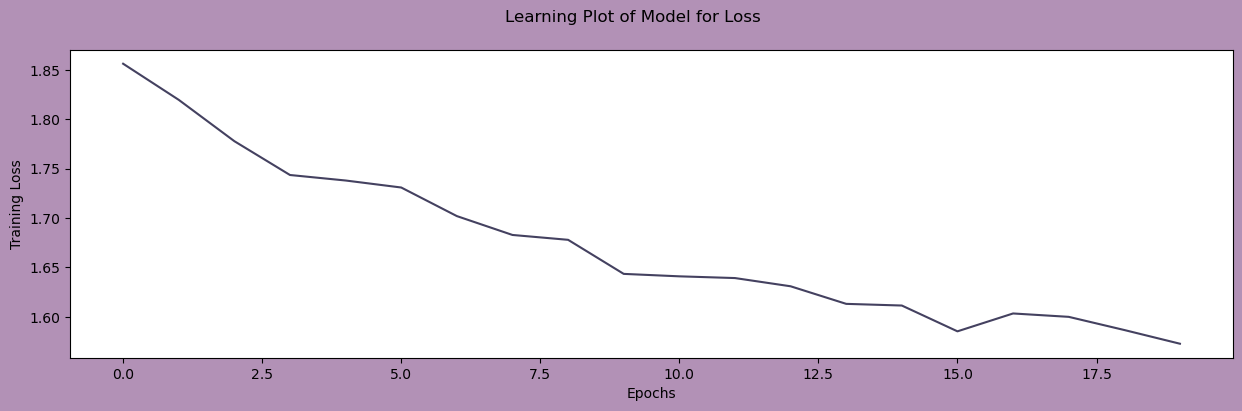

In [34]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [35]:
# The function to generate text from model
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter 
    seed=[mapping[char] for char in starter]
    generated += starter 
    # Generating new text of given length
    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]  
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]  
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char
       
    return generated

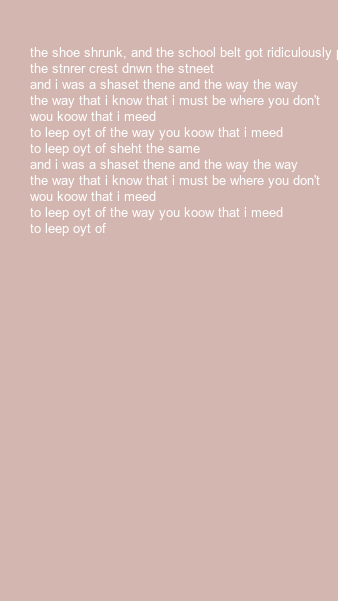

In [38]:
#Generating a song from the model
song_1 = Lyrics_Generator("the shoe shrunk, and the school belt got ridiculously petit", 400)
#Let's have a look at the song
My_song(song_1)